#Data clean - Second part

##For this case, i have clean data in general, i will work with the variables(columns), i will see relations between them and will modificate the variables if it´s necesary 
##My dataset is about insurance 

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder

##Overview of my dataset

In [ ]:
df_insurance = pd.read_csv('./data/dataset_seguros_sin_nulos.csv')
df_insurance

In [6]:

df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


In [7]:
df_insurance.head()

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI


In [8]:
#I see the values inside each variable 
for i in df_insurance:
  print('\n', i, df_insurance[i].unique())


 EDAD [37 25 52 23 60 34 63 18 35 24 38 58 43 31 22 45 59 56 30 44 26 61 20 32
 42 40 47 27 41 36 64 28 53 33 29 50 55 49 54 46 57 48 39 21 62 51 19]

 SEXO ['MASCULINO' 'FEMENINO']

 IMC [29.83  26.22  30.78  23.845 36.005 31.92  23.085 26.315 36.67  26.6
 37.05  38.665 35.625 31.825 27.36  28.5   39.805 26.885 38.285 19.95
 25.46  30.115 32.205 28.595 23.75  31.35  28.785 26.505 22.04  22.42
 32.49  37.145 23.37  25.175 28.215 18.905 15.96  33.155 41.895 39.33
 28.88  27.74  41.23  33.25  31.635 22.135 28.975 17.29  25.365 24.32
 32.395 25.84  27.455 28.12  40.565 27.645 48.07  36.765 29.64  22.99
 27.55  22.61  34.865 32.775 37.335 40.945 34.105 36.385 35.72  32.3
 33.345 35.245 30.4   22.23  24.89  17.955 30.685 31.445 38.38  20.235
 17.195 30.59  27.265 31.73  16.815 29.45  38.095 25.935 31.065 25.08
 27.93  26.03  25.27  32.11  30.875 33.915 39.425 28.025 35.435 41.325
 33.44  32.68  36.86  34.295 23.465 35.91  21.85  33.725 26.98  19.
 33.535 22.705 38.19  26.41  31.54  32.015 

##My objective is leave my variables in numeric format

##For the **FUMADOR** column, i will change False/True by 0/1. I do a copy

In [17]:
df_insurance2= df_insurance.copy()

In [18]:
df_insurance2['FUMADOR_INT'] = df_insurance2['FUMADOR'].astype(int)

##For the **SEXO** column, i will change Masculino/Femenino by 0/1.

In [19]:
df_insurance2['SEXO'] = np.where(df_insurance2['SEXO']=='FEMENINO',0,1)

In [20]:
df_insurance2.head(1)

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE,FUMADOR_INT
0,37,1,29.83,80,2,BARCELONA,534,ALTO,False,AUDI,0


In [30]:
target=['PRECIO']
def get_list_var(dataset):
    list_numbers=[]
    list_booleans=[]
    list_categories=[]

    for i in dataset:
      if (i not in target) and (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') :
        list_numbers.append(i)
      elif (i not in target) and (dataset[i].dtype.kind == 'b'):
        list_booleans.append(i)
      elif (dataset[i].dtype.kind != 'o' and (i not in target)):
        list_categories.append(i)

    return list_numbers, list_booleans, list_categories

In [31]:
l_num, l_bool, l_cat = get_list_var(df_insurance2)

In [34]:
l_num

['EDAD', 'SEXO', 'IMC', 'PESO', 'HIJOS', 'FUMADOR_INT']

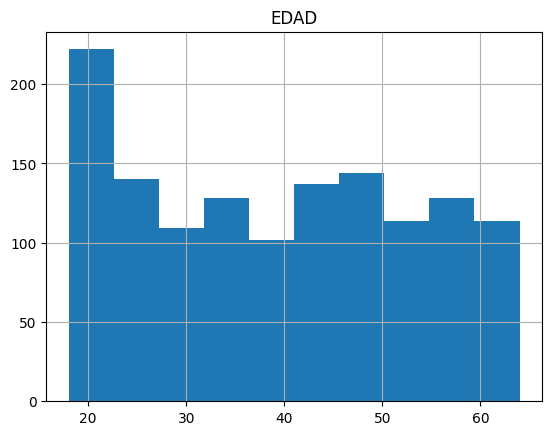

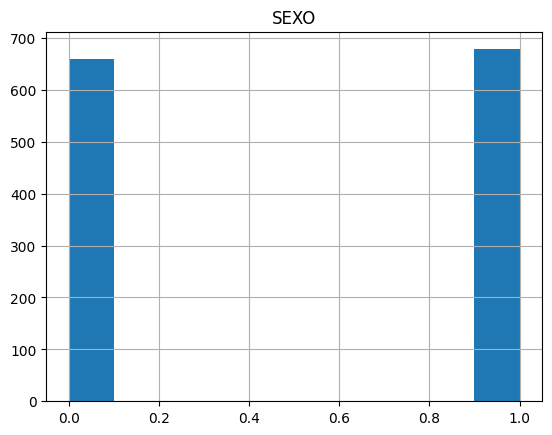

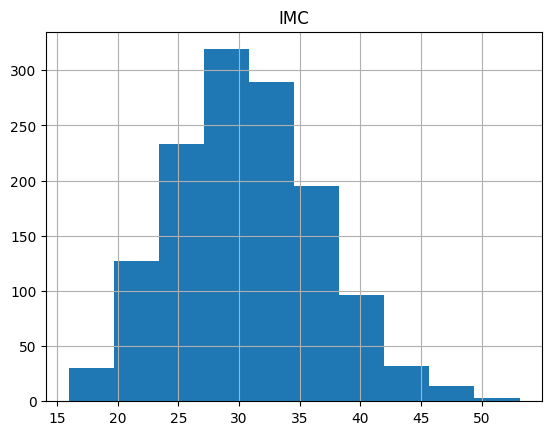

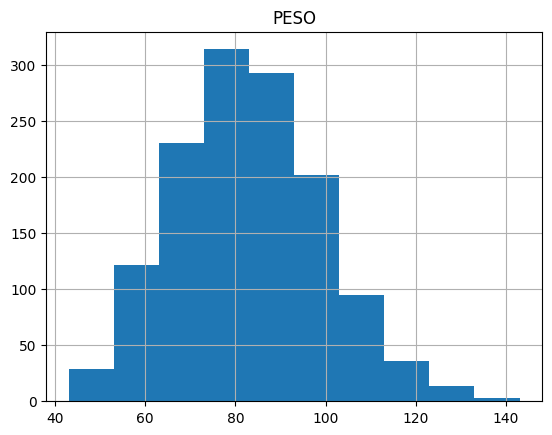

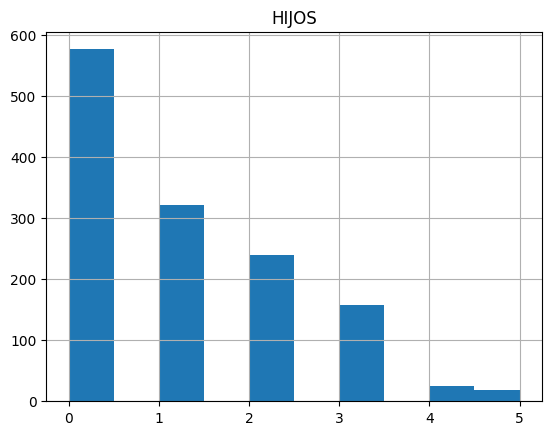

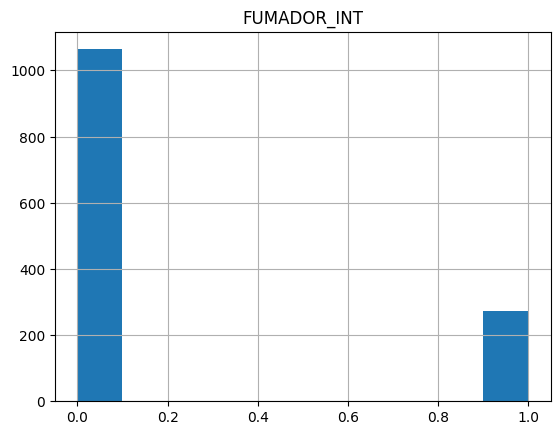

In [36]:
#df_insurance2.info()
#For my numerics variables, i do histograms
for i in l_num:
    df_insurance2.hist(i)

In [37]:
#i do a copy for do to correlation with "corr"
df_insurance3 = df_insurance2.copy()

##One time i have the numerics variables, i do the correlation with "corr" tool

In [38]:
corr = df_insurance3.corr(numeric_only=True)

In [39]:
corr.style.background_gradient(cmap='coolwarm')

,EDAD,SEXO,IMC,PESO,HIJOS,PRECIO,FUMADOR,FUMADOR_INT
EDAD,1.000000,-0.020581,0.107672,0.110553,0.041946,0.299007,-0.025019,-0.025019
SEXO,-0.020581,1.000000,0.048773,0.048953,0.018189,0.057284,0.074670,0.074670
IMC,0.107672,0.048773,1.000000,0.997731,0.011162,0.197734,0.003433,0.003433
PESO,0.110553,0.048953,0.997731,1.000000,0.013555,0.199860,0.005331,0.005331
HIJOS,0.041946,0.018189,0.011162,0.013555,1.000000,0.066241,0.008926,0.008926
PRECIO,0.299007,0.057284,0.197734,0.199860,0.066241,1.000000,0.787255,0.787255
FUMADOR,-0.025019,0.074670,0.003433,0.005331,0.008926,0.787255,1.000000,1.000000
FUMADOR_INT,-0.025019,0.074670,0.003433,0.005331,0.008926,0.787255,1.000000,1.000000


In [42]:
#I see that **PESO** and **IMC** are correlated beetween them
#I will delete one of they, in this case: **PESO**
del df_insurance3['PESO']
del df_insurance3['FUMADOR']

#Check the **PRECIO** variable 

array([[<AxesSubplot: title={'center': 'PRECIO'}>]], dtype=object)

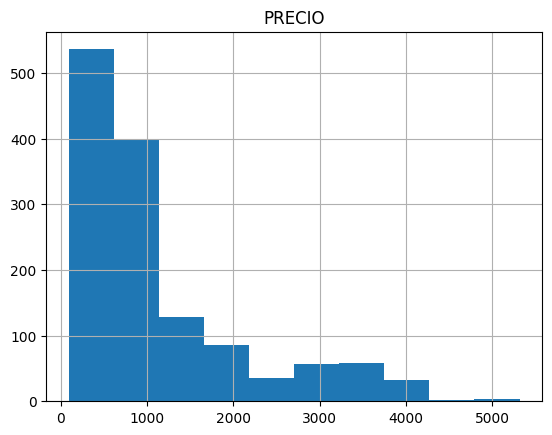

In [43]:
df_insurance3.hist('PRECIO')

array([[<AxesSubplot: title={'center': 'Log_precio'}>]], dtype=object)

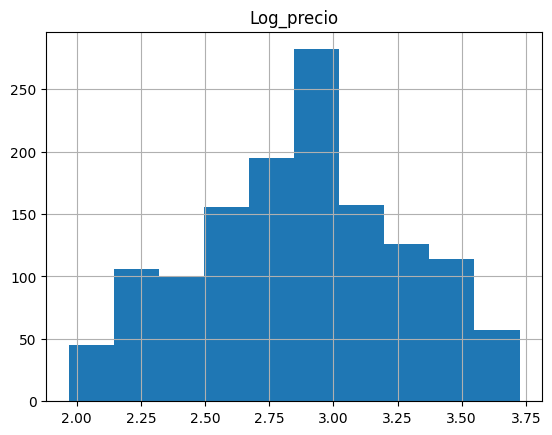

In [44]:
#I create new column with the logaritmic of PRECIO
df_insurance3['Log_precio'] = np.log10(df_insurance3['PRECIO'])
df_insurance3.hist('Log_precio') #it histogram have normal distribution

In [45]:
df_insurance3.head(1)

,EDAD,SEXO,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_INT,Log_precio
0,37,1,29.83,2,BARCELONA,534,ALTO,AUDI,0,2.727541


In [48]:
l_cat

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

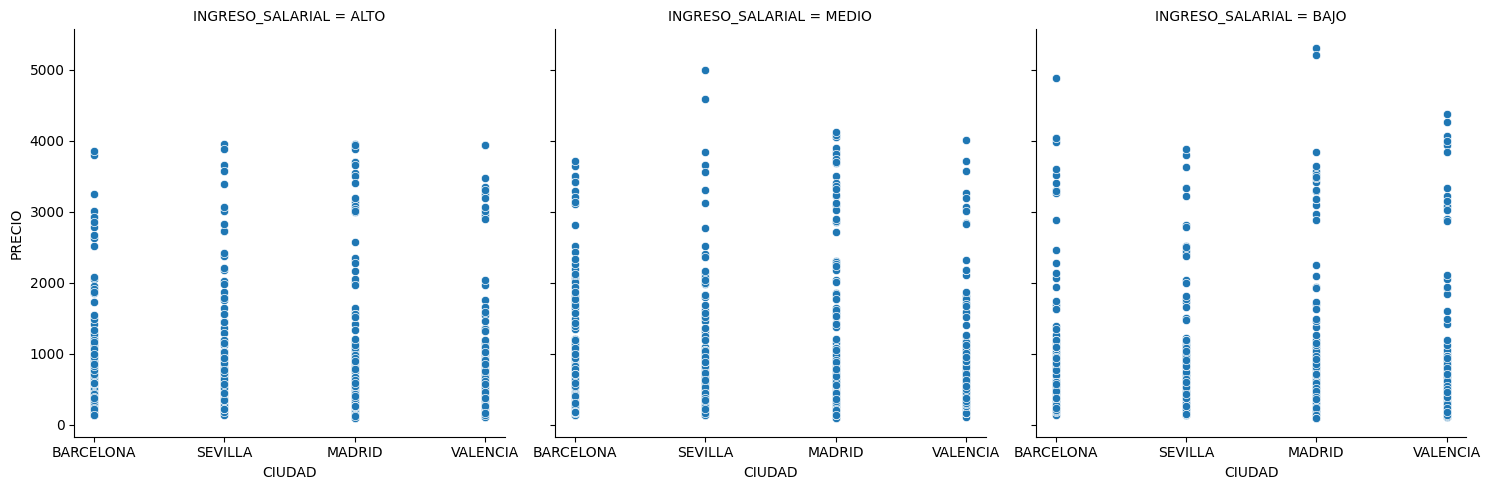

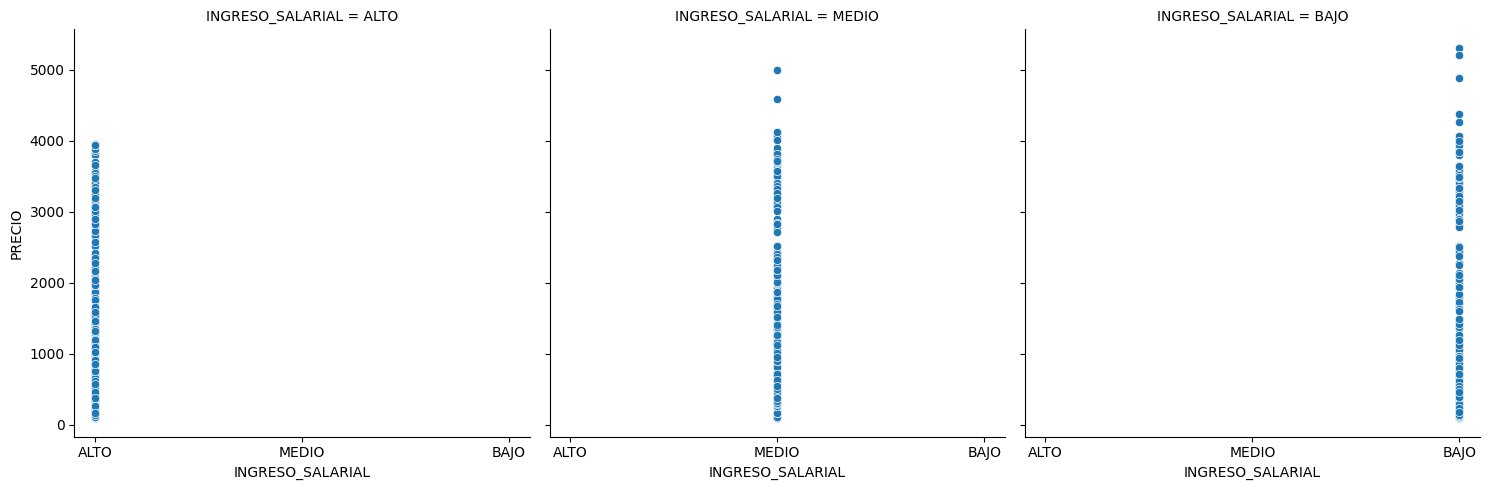

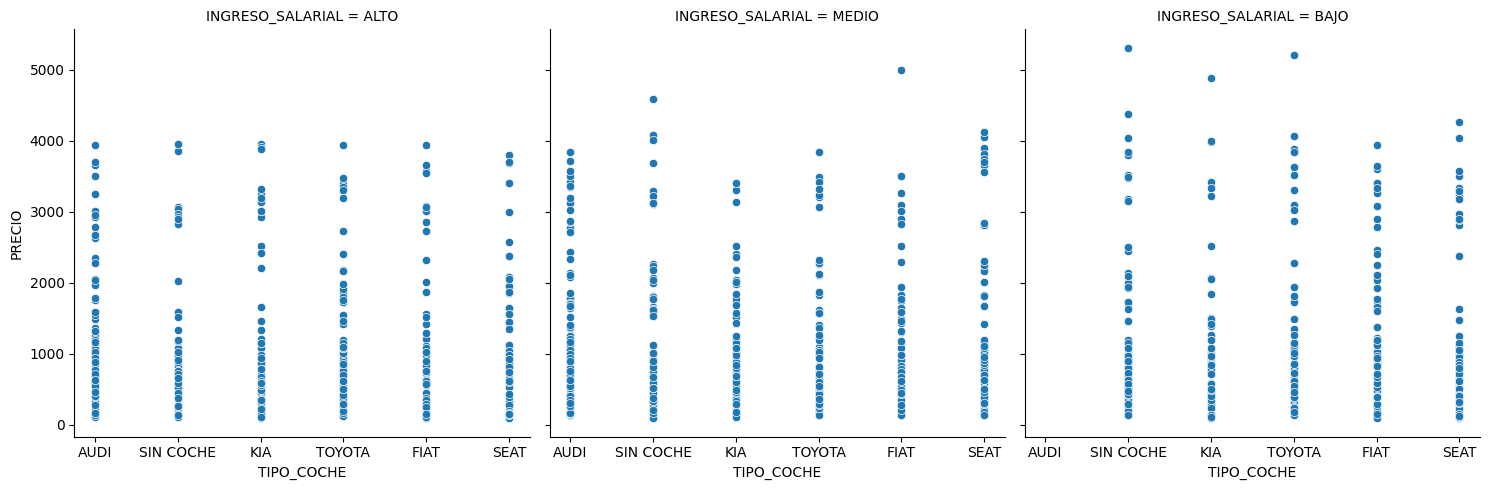

In [50]:
for i in l_cat:
    sns.relplot(data=df_insurance3, x=i, y="PRECIO",col='INGRESO_SALARIAL')

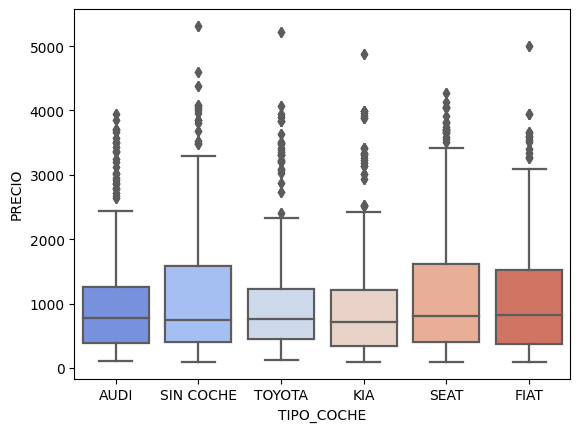

In [54]:
sns.boxplot(x='TIPO_COCHE', y='PRECIO', data=df_insurance3, palette='coolwarm')

<AxesSubplot: xlabel='CIUDAD', ylabel='PRECIO'>

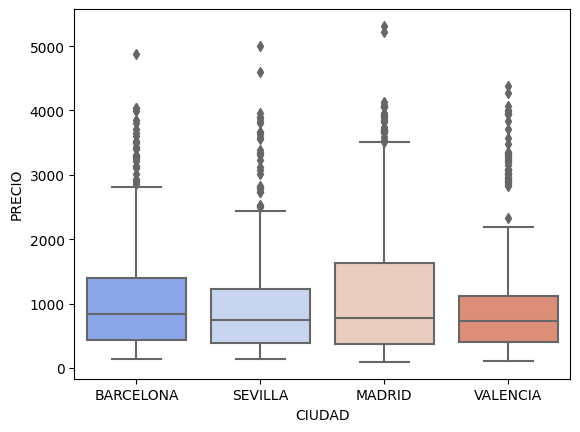

In [55]:
sns.boxplot(x='CIUDAD', y='PRECIO', data=df_insurance3, palette='coolwarm')

In [58]:
l_cat

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

##Now i will change my categorical variables(l_cat) to numerics variables

###I will use Ordinal Encoder with the **INGRESO_SALARIAL** column because i can get value for each item, previus copy

In [59]:
df_insurance4 = df_insurance3.copy()

In [60]:
oe = OrdinalEncoder(categories=[['BAJO','MEDIO','ALTO']])

In [61]:
oe

OrdinalEncoder(categories=[['BAJO', 'MEDIO', 'ALTO']])

In [62]:
df_insurance4['INGRESO_SALARIAL_INT'] = oe.fit_transform(df_insurance4[['INGRESO_SALARIAL']])

In [66]:
#df_insurance4.head(1)
#Delete the "INGRESO_SALARIAL" column
del(df_insurance4['INGRESO_SALARIAL'])

In [69]:
#l_cat.remove('INGRESO_SALARIAL')
l_cat

['CIUDAD', 'TIPO_COCHE']

###For my other categorical variables i will use ""getdummies"

In [70]:
df_insurance4 = pd.get_dummies(data=df_insurance4, columns=l_cat,dtype=int)

In [71]:
df_insurance4.head()

,EDAD,SEXO,IMC,HIJOS,PRECIO,FUMADOR_INT,Log_precio,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,37,1,29.830,2,534,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,25,1,26.220,0,227,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,52,0,30.780,1,900,0,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,23,1,23.845,0,200,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,60,0,36.005,0,1102,0,3.042182,1.0,1,0,0,0,1,0,0,0,0,0


###One time i have my variables in numeric format, i standardized under the same scale

In [73]:
l_num.remove('SEXO')
l_num.remove('FUMADOR_INT')
l_num.remove('PESO')

In [74]:
#I will use MinMaxScaler
minMaxResultado = MinMaxScaler()

In [76]:
df_insurance4[l_num] = minMaxResultado.fit_transform(df_insurance4[l_num])

In [77]:
df_insurance4.head()

,EDAD,SEXO,IMC,HIJOS,PRECIO,FUMADOR_INT,Log_precio,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,0.413043,1,0.373150,0.4,534,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,0.152174,1,0.276029,0.0,227,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,0.739130,0,0.398709,0.2,900,0,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,0.108696,1,0.212133,0.0,200,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,0.913043,0,0.539279,0.0,1102,0,3.042182,1.0,1,0,0,0,1,0,0,0,0,0
